### Neural network weight initialization

- Implement different initialization methods for neural networks.

*Xavier initialization*:
$$Var(W) = \frac{1}{n^{[l-1]}}$$
$$W = N(0,1) * \sqrt{\frac{1}{n^{[l-1]}}}$$

*He initialization*:
$$Var(W) = \frac{2}{n^{[l-1]}}$$
$$W = N(0,1) * \sqrt{\frac{2}{n^{[l-1]}}}$$

*Bengio initialization*:
$$Var(W) = \frac{2}{n^{[l-1]} + n^{[l]}}$$
$$W = N(0,1) * \sqrt{\frac{2}{n^{[l-1]} + n^{[l]}}}$$

*Random initialization*:
$$W = N(0,1) * \text{scaling factor}$$

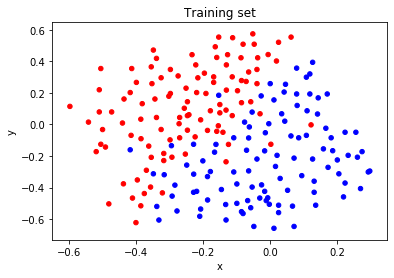

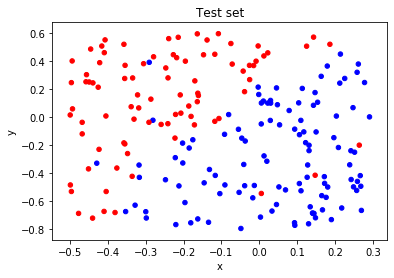

In [5]:
from utils import linear_forward, sigmoid, relu, activation_forward, forward_prop, linear_backward, sigmoid_backward, activation_backward, backward_prop, update_params, cost, predict 
import numpy as np
import scipy.io
import matplotlib.pyplot as plt
%matplotlib inline

data = scipy.io.loadmat('data.mat')
train_X = data['X'].T
train_Y = data['y'].T
test_X = data['Xval'].T
test_Y = data['yval'].T

plt.scatter(train_X[0, :], train_X[1, :], c=train_Y[0], s=20, cmap=plt.cm.bwr)
plt.title('Training set')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

plt.scatter(test_X[0, :], test_X[1, :], c=test_Y[0], s=20, cmap=plt.cm.bwr)
plt.title('Test set')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [6]:
def initialize_weights(layer_dims, method):
    np.random.seed(1)
    L = len(layer_dims)
    param = {}
    
    for l in range(1,L):
        param['W' + str(l)] = np.random.randn(layer_dims[l], layer_dims[l-1])
        param['b' + str(l)] = np.zeros((layer_dims[l], 1))
        
        #Xavier initialization
        if method == 'Xavier':
            param['W' + str(l)] = param['W' + str(l)] * np.sqrt(1 / layer_dims[l-1])
            
        #He initialization
        if method == 'He':
            param['W' + str(l)] = param['W' + str(l)] * np.sqrt(2 / layer_dims[l-1])
            
        #Bengio initialization
        if method == 'Bengio':
            param['W' + str(l)] = param['W' + str(l)] * np.sqrt(2 / (layer_dims[l] + layer_dims[l-1]))

        #Random initialization            
        if method == 'Random':
            param['W' + str(l)] = param['W' + str(l)] * 0.01
            
    return param

In [7]:
if __name__ == '__main__':
    layer_size = [2, 5, 5, 1]
    param = param = initialize_weights(layer_size, 'Xavier')
    nepochs = 50000
    for step in range(0,nepochs):
        A, cache = forward_prop(train_X, param, layer_size)
        if step%5000==0:
            J = cost(A, train_Y)
            pred, acc = predict(A, train_Y)
            print('step ', step, ', cost=', J, ', acc=', acc, sep='')
        grads = backward_prop(train_Y, A, cache, layer_size)
        param = update_params(param, grads, layer_size)
        
    J = cost(A, train_Y)
    pred, acc = predict(A, train_Y)
    print('step ', step+1, ', cost=', J, ', acc=', acc, sep='')
    
    Atest, cachetest = forward_prop(test_X, param, layer_size)
    pred, acc = predict(Atest, test_Y)
    print('step ', step+1, ', cost (test set)=', J, ', acc (test set)=', acc, sep='')

step 0, cost=0.698, acc=0.5450236966824644
step 5000, cost=0.688, acc=0.7156398104265402
step 10000, cost=0.662, acc=0.7677725118483413
step 15000, cost=0.587, acc=0.7725118483412322
step 20000, cost=0.493, acc=0.8293838862559242
step 25000, cost=0.422, acc=0.8483412322274881
step 30000, cost=0.367, acc=0.8625592417061612
step 35000, cost=0.327, acc=0.8909952606635071
step 40000, cost=0.298, acc=0.909952606635071
step 45000, cost=0.278, acc=0.9241706161137441
step 50000, cost=0.266, acc=0.9241706161137441
step 50000, cost (test set)=0.266, acc (test set)=0.92


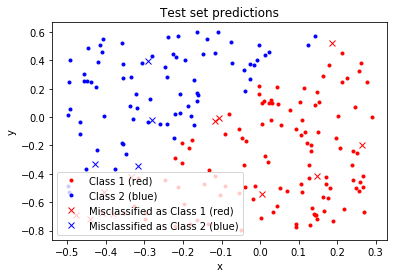

In [8]:
plt.plot(test_X[0, (pred[0]==0) & (test_Y[0]==pred[0])], test_X[1, (pred[0]==0) & (test_Y[0]==pred[0])], '.', color='red', label='Class 1 (red)')
plt.plot(test_X[0, (pred[0]==1) & (test_Y[0]==pred[0])], test_X[1, (pred[0]==1) & (test_Y[0]==pred[0])], '.', color='blue', label='Class 2 (blue)')
plt.plot(test_X[0, (pred[0]==0) & (test_Y[0]!=pred[0])], test_X[1, (pred[0]==0) & (test_Y[0]!=pred[0])], 'x', color='red', label='Misclassified as Class 1 (red)')
plt.plot(test_X[0, (pred[0]==1) & (test_Y[0]!=pred[0])], test_X[1, (pred[0]==1) & (test_Y[0]!=pred[0])], 'x', color='blue', label='Misclassified as Class 2 (blue)')
plt.title('Test set predictions')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best')
plt.show()